# Contact mechanics buy using active set method

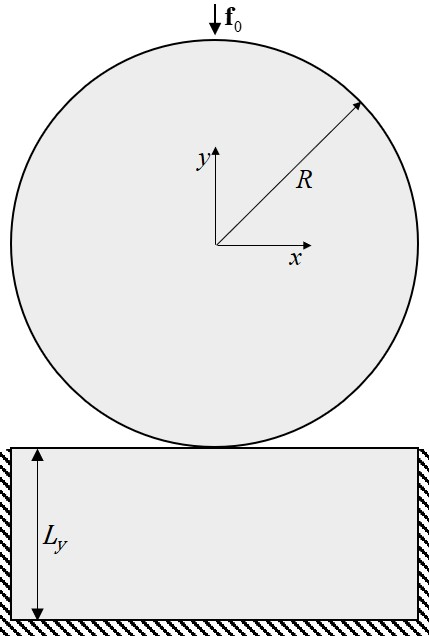

In [1]:
from IPython.display import Image
Image(filename="ModelContact.jpg", width = 340, height = 550)

In [2]:
from IPython import get_ipython
get_ipython().magic('reset -sf') 
import numpy as np
import math
import meshing
import plot
import matplotlib.pyplot as plt
import auxiliary
import FEM
import contact

In [3]:
aux = auxiliary.AuxiFu()
discre = FEM.Discretization()
boucon = FEM.SetupModel()
solution = FEM.PostProcessing()
f0 = 1E2
phi =  math.pi/200
R, N, ly, ny, d0 = 1, 400, 1, 4, 1E-2 # see detail in the figure. N = 4, 16, 36, 64, 100, ...
p, t, boucir, bourec, slapoi, pospoi, numcir, numrec = meshing.hertmesh( R, N, ly, ny, d0 )
p6, t6, [] = meshing.t3tot6([], p, t, [])
material, dirdof, dirval, neudof, neuval, possla, posmas, gap = boucon.hertcontact ( p6, t6, R, N, boucir, numcir, bourec, f0, phi )
gap = gap + d0
p0 = np.copy(p6);  pori = np.copy(p6)
p0[:,0] = p6[:,0]*math.cos(phi) - p6[:,1]*math.sin(phi); p0[:,1] = p6[:,0]*math.sin(phi) + p6[:,1]*math.cos(phi)
p6 = np.copy(p0)
slapoi = p6[possla,:]
maspoi = p6[posmas,:]

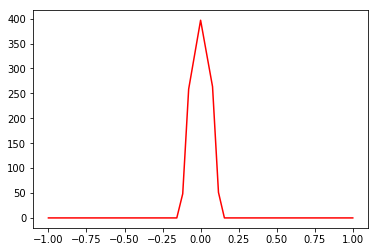

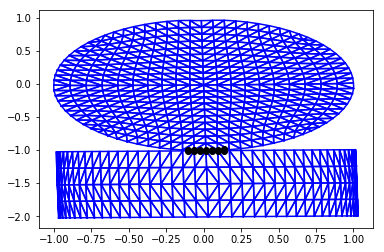

In [4]:
lefhs = discre.stiffness( p6, t6, material, []) 
righs = discre.loadsegment( p6, neudof, neuval)
disp, consla, conmas, traction = contact.contactsolver(p6, t6, material, [], lefhs, righs, dirdof, dirval, slapoi, maspoi, gap, 0)
U = np.concatenate((disp[::2], disp[1::2]), axis = 1)
fig, grid = plt.subplots()
grid.plot(pori[possla,0], -traction,'r-') 
fig, grid = plt.subplots()
plot.trisurf2d(fig, grid, p6 + U, t6, eleind = 0, nodind = 0, line = [], point = p6[np.concatenate((consla,conmas)),:], parame = [])
plt.show()